# 1.2.2: Bikeshare (Implementation)

<br>



---



*Modeling and Simulation in Python*


Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

<br>

---





## Defining our Bikeshare Model

In the previous chapter , developed a couple of important tools.  We have a `Series` that we can use to store the state of the system, and a basic *change function*.   So start to build our model.


### Investigation

To build our model, we need to know something about our system.  Let's say that we put a camera on the Augie bike rack, and bikes are taken out at the following times one Thursday morning between 8 and noon:

* 8:14, 8:17, 8:58, 10:02, 10:02, 10:22, 10:43, and 11:41

Between noon and 4 pm, bikes are taken at:

* 12:37, 12:55, 2:10, 2:10, 3:06, 3:22, 3:29, and 3:55

How do we model this?  First, we might consider the overall averages: 16 bikes are taken over the course of 8 hours, or 2 per hour.  

<br>

Next, we might consider patterns: there seems to be a rush in the late afternoon, and maybe one in the morning, but we might need more data to confirm that.  We also notice that twice two people (friends?) take out bikes at the same time.

<br>

Ideally, we'd want to get more data to decide if these patteners were important: maybe Saturdays are a lot different than Thursdays, too!  But our manager wants a simulation done tomorrow, so that's not an option.


### Abstraction

Abstraction is about simplification, particularly when we are preparing the initial implementation.  So at least for now, we'll ignore time-based patterns (time of day, day of the week) for the time being.  So the only factor we'll determine a constant likelihood of someone picking up a bike within a given time period.

2 people on average pick up a bike per hour.  But if we made that the "rule" of our model, the model would not work very well (why?).  So let's subdivide the hour.  We'll say that in any given 15 minutes, there is a 50% chance that someone will pick up a bike at the Augie bikerack.  Further investigation tells us that the percentage is 40% at the Moline rack.

These abstraction decisions gives us our set of rules that will guide our implementation.

✅ Active reading: What would be the problem with making a "rule" that every hour 2 bikes were picked up?

## Implentation

So let's see what happens to our system using our set of rules. This is where we move from modeling to simulating: using computational tools to help us observe the change in our system.

### Importing our own functions

Before we get started, we need to do some bookkeeping.  In earlier notebooks, we imported the `pandas` library, which contains the rules for using a `Series`, and we imported some mathematical functions from the `NumPy` library.

<br>

We can also import functions that we have made ourselves.  In this class, these 'homemade functions' are stored in files called modsim.py and chap0x.py.

<br>

The code in the cell below checks to see if those files exist, and if not, it creates a 'ModSimPy_Functions' folder,
and downloads the requested files from my github account.  Once the files are there, the "import" line
pulls a set of ready-made functions into the notebook
so that they can be used whenever necessary
Here we want to use a function called `flip` which is in the file `modsim.py`.

<br>

Don't worry!  You are not expected to understand how the code in this cell works.  Just recognize that we are pulling in *functions* and *object types* from outside sources.

In [ ]:
# This section defines a function that downloads any 
# missing ModSimPy files
from os.path import basename, exists
from os import mkdir

def download(url,folder):
    filename = folder + basename(url)
    if not exists(folder):
        mkdir(folder)
    # fetches the file at the given url if it is not already present
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

# This line calls the 'download' function that is defined above,
# and provides the url address from which the file should be
# downloaded.
download('https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Notebooks/'
        + 'ModSimPy_Functions/modsim.py', 'ModSimPy_Functions/')

# Now that we know the file is where it should be, we can
# import the file.  The asterisk (*) tells the program to import
# all of the functions (including 'flip') from that file
from ModSimPy_Functions.modsim import *

Downloaded ModSimPy_Functions/chap01.py


### Using `If` to create a *stochastic* change function

On to our simulations!  At this point we have functions that simulate moving bikes

<br>

As our investigation showed the the arrival of a customer is somewhat random.  Because of this we'll create a *stochastic* rule: that is, we will use a random number generator to determine when customers arrive at each station.

<br>

The ModSim library provides a function called `flip` that generates random "coin tosses".
When you call it, the function provides a probability between 0 and 1, like this:

In [ ]:
flip(0.7)

True

The result is one of two values: `True` with probability 0.7 (in this example) or `False`
with probability 0.3. If you run `flip` like this 100 times, you should
get `True` about 70 times and `False` about 30 times. But the results
are random, so they might differ from these expectations.  Run the cell above multiple times to confirm that the answer differs over time.

<br>

`True` and `False` are special values defined by Python. 
They are called *boolean* values because they are
related to Boolean algebra (<https://modsimpy.com/boolean>).  Note that they are not strings. There is a difference between `True`, which is a boolean value, and `'True'`, which is a string.

<br>

We can use boolean values to control the behavior of the program, using an *if statement*:

In [ ]:
if flip(0.5):
    print('heads')

If the result from `flip` is `True`, the program displays the string
`'heads'`. Otherwise it does nothing.

<br>

The syntax for `if` statements is similar to the syntax for
function definitions: the first line has to end with a colon, and the
lines inside the `if` statement have to be indented.

<br>

Optionally, you can add an *else clause* to indicate what should
happen if the result is `False`:

In [ ]:
if flip(0.5):
    print('heads')
else:
    print('tails')    

heads


If you run the previous cell a few times, it should print `heads` about half the time, and `tails` about half the time.

<br>

Now we can use `flip` to simulate the arrival of customers who want to
borrow a bike. We decided that the chance that a student will check out a bike from Augie in any given 15 minutes is 50%.  We can *implement* that observation in our simulation like this:

In [ ]:
def bike_to_moline():
    print('Moving a bike to Moline')
    bikeshare.moline += 1
    bikeshare.augie -= 1
    
if flip(0.5):
    bike_to_moline()

Moving a bike to Moline


Notice that I've included the function definitions from the previous chapter, since those are not loaded in this notebook.

<br>

Similarly, we learned that the chance of a student checking out a bike in Moline in any 15 minute window is 40%:

In [ ]:
def bike_to_augie():
    print('Moving a bike to Augustana')
    bikeshare.moline -= 1
    bikeshare.augie += 1

if flip(0.4):
    bike_to_augie()

Moving a bike to Augustana


We can combine these snippets into a function that simulates a *time step*, which is an interval of time, in this case one minute.

In [ ]:
# A more interesting change function
def change_func():
    if flip(0.5):
        bike_to_moline()
    
    if flip(0.4):
        bike_to_augie()

Then we can simulate a time step like this:

In [ ]:
import pandas as pd

bikeshare = pd.Series(dict(augie=10,moline=2),name='Number of Bikes')
change_func()

pd.DataFrame(bikeshare)

Moving a bike to Moline


,Number of Bikes
augie,9
moline,3


Depending on the results from `flip`, this function might move a bike to augie, or to moline, or neither, or both.  Run change_func multiple times (by clicking 'shift-enter' in the box above) and note how the state of the system changes.

<br>

`change_func` is our first fully-formed change function!  We can run this function *n* number of times, and it will simulate the changes in the state of the system over a period of n*15 minutes.

### Using parameters to add flexibilty to a change function

The previous version of `change_func` is fine if the arrival probabilities
never change, but in reality they may vary over time.  So instead of putting the constant values 0.5 and 0.4 in `step`, we can replace them with *parameters*.
Parameters are variables whose values are set when a function is called.

<br>

Here's a version of `change_func` that takes two parameters, `p1` and `p2`:

In [ ]:
def change_func(p1, p2):
    if flip(p1):
        bike_to_moline()
    
    if flip(p2):
        bike_to_augie()

The values of `p1` and `p2` are not set inside this function; instead,
they are provided when the function is called, like this:

In [ ]:
change_func(0.5, 0.4)

Moving a bike to Moline


The values you provide when you call the function are called
*arguments*. The arguments, `0.5` and `0.4` in this example, get
assigned to the parameters, `p1` and `p2`, in order. So running this
function has the same effect as:

In [ ]:
p1 = 0.5
p2 = 0.4

if flip(p1):
    bike_to_moline()
    
if flip(p2):
    bike_to_augie()

Moving a bike to Moline


The advantage of using parameters is that you can call the same function many times, providing different arguments each time.

<br>

Adding parameters to a function is called *generalization*, because it makes the function more general; without parameters, the function always does the same thing; with parameters, it can do a range of things.

✅ Active Reading: What is the advantage of using a parameter in a function rather than "hard-coding" a value in the function?

### Using `for loops` to simulate the passage of time

At some point you will get sick of running cells over and over.
Fortunately, there is an easy way to repeat a chunk of code, the *for loop*. Here's an example:

In [ ]:
for i in range(3):
    print(i)
    bike_to_moline()

0
Moving a bike to Moline
1
Moving a bike to Moline
2
Moving a bike to Moline


The syntax here should look familiar; the first line ends with a
colon, and the lines inside the `for` loop are indented. The other
elements of the loop are:

-   The words `for` and `in` are special words we have to use in a for
    loop.

-   `range` is a Python function we use to control the number of times the loop runs.

-   `i` is a *loop variable* that gets created when the for loop runs.

When this loop runs, it runs the statements inside the loop three times.  The first time, the value of `i` is `0`; the second time, it is `1`; the third time, it is `2`.  Each time through the loop, it prints the value of `i` and moves one bike to Moline.

### Using a `Series` to record change

When we run a simulation, we often want to save the results for later analysis. We can save those results in a `Series`.  In this case, the labels are integers representing minutes; from now on, we'll call the collection of labels in a `Series` the `index`. In this case, the variables, or `values`, are the number of bikes at *one* location.

<br>

Since we have moved a number of bikes around, let's start again with a new state object.  When you run this cell, it overwrites any previously existing values for `bikeshare`.

In [ ]:
bikeshare = pd.Series(dict(augie=10,moline=2),name="Number of Bikes")

We can create a new, empty `Series` to keep track of our results.:

In [ ]:
results = pd.Series([], dtype=object)
results.name='Number of Bikes at Augie'
results.index.name = 'Time (m)'

* The first line creates a `Series` with no values: the "[ ]" signifies there are no current values, but values might be added later. `dtype` tells it to expect any kind of object in the series.  

* The next two lines give a title to the index column ('Time (m)') and to the values column ('Number of Bikes at Augie'): these additions do not affect the actual labels or values in the `Series`.

Now we can add a quantity to our empty `Series` like this:

In [ ]:
results[0] = bikeshare.augie
results[0]

10

The number in brackets is the *label* for the first entry: that is, it is the initial state.  We can use a `Series` inside a `for` loop to store the results of the simulation:

In [ ]:
results[0] = bikeshare.augie
for i in range(3):
    print(i)
    change_func(0.6, 0.6)
    results[i+1] = bikeshare.augie
    
pd.DataFrame(results)

0
Moving a bike to Moline
1
Moving a bike to Moline
Moving a bike to Augustana
2
Moving a bike to Moline
Moving a bike to Augustana


,Number of Bikes at Augie
Time (m),
0,10
1,9
2,9
3,9


Each time through the loop, we print the value of `i` and call `change_func`, which updates `bikeshare`.
Then we store the number of bikes at Augustana at that time step in `results`. 
We use the loop variable, `i`, to compute the time stamp, `i+1`.

The first time through the loop, the value of `i` is `0`, so the time stamp is `1`.
The last time, the value of `i` is `2`, so the time stamp is `3`.

When the loop exits, `results` contains 4 time stamps, from 0 through
3, where time 0 is the initial state.  The `Series` stores the number of bikes at Augie at the end of each time step.  Check to see that the changes that are printed out match the changing number of bikes.

✅ Active Reading: Why do we save the result as in `results[i+1]` rather than `results[i]`?

### Using `plot` to display results

`Series` provides a function called `plot` we can use to plot
the results:

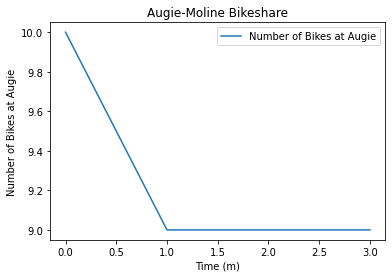

In [ ]:
results.plot(xlabel=results.index.name, ylabel=results.name,
            title='Augie-Moline Bikeshare',
            legend=True);

The result should be a plot with time on the $x$-axis and the number of bikes on the $y$-axis.
Since we only ran three time steps, it might not be very interesting.

<br>

Technical point: The function `plot`, in addition to making the plot, *returns* the axes of the plot.  The semicolon (;) tells Jupyter not to print this returned value.  Just for fun, remove the semicolon and run the cell again, and see what happens.

<br>



---



## Summary and Exercises

This chapter introduces the tools we need to run simulations, record the results, and plot them.

* We used the `flip` function and an `if` statement to simulate a `change function`.

* We used a `for` loop to simulate a series of steps, and another `Series` to record the results.

* Finally, we used `plot` to plot the results.  That's a lot of stuff!  

In the next chapter, we'll start to work on the simulation in order to make it a little more realistic.

<br>



---



### Exercise 1

✅ Wrap the code in the chapter in a function named `run_simulation` that takes three parameters, named `p1`, `p2`, and `num_steps`.

It should:

1. Create a `Series` object to hold the results.

2. Use a for loop to run `change_func` the number of times specified by `num_steps`, passing along the specified values of `p1` and `p2`.

3. After each step, it should save the number of bikes at augie in the `Series`.

4. After the for loop, it should plot the results.

To test your function:

1. Create a state `Series` with the initial state of the system.

2. Call `run_simulation` with parameters `p1=0.3`, `p2=0.2`, and `num_steps=60`.

This is challenging, but most of this code is in the chapter above.  Take advantage of cut-and-paste!

In [ ]:
# Define the function
def run_simulation(p1,p2,num_steps):
    results = pd.Series([],dtype=object)
    results.name = 'Number of Bikes at Augie'
    results.index.name = 'Time Step'
    results[0] = bikeshare.augie
    
    for i in range(num_steps):
        change_func(p1,p2)
        results[i+1] = bikeshare.augie
    results.plot(xlabel=results.index.name, ylabel=results.name,
            title='Augie-Moline Bikeshare',
            legend=True);
        

Moving a bike to Augustana
Moving a bike to Moline
Moving a bike to Augustana
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Augustana
Moving a bike to Augustana
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Augustana
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Augustana
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Augustana
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Moline


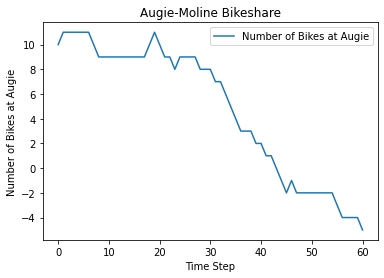

In [ ]:
# Test the function with the given values
bikeshare = pd.Series(dict(augie=10,moline=2),name="Number of Bikes")
run_simulation(0.3,0.2,60)

### Exercise 2

✅  In the next chapter, we'll look for ways that we can improve this model.  In preparation, take a moment and try to list 3 aspects of a realistic bikeshare system that this model does not take into account.   Choose one of the aspects that you think might make the biggest difference, and suggest in a couple sentences how you might incorporate that aspect into the model (not in terms of code--just in terms of process).  

Put your answer in a Markdown cell below this one. 
